### Unidad 1: Taller de resolución de problemas de clasificación automática

<h1> Notebook 3 - Introducción a árboles de decisión</h1>

En este notebook, utilizaremos el algorítmo de *árbol de decisión* para la clasificación automática. En un primer tiempo, ilustraremos su uso a través de la librería scikit-learn.

### 1. Problema de clasificación y dataset

Consideremos el problema siguiente:

Queremos aprender un modelo de clasificación capaz de predecir si una persona va a tener o no una enfermedad del corazon.

Tenemos 303 observaciones del pasados, descritas por 14 características:
1. age: el edad de la persona (en año),
2. sex: el genero (0 = mujer, 1 = hombre)
3. cp: tipo de dolor torácico (0, 1, 2 o 3)
4. trestbps: Presión sanguínea en reposo (en mm Hg).
5. chol: colestoral en suero en mg/dl
6. fbs: azúcar en sangre > 120 mg/dl (1 = verdadero; 0 = falso)
7. restecg: resultados electrocardiográficos en reposo
8. thalach: frecuencia cardíaca máxima alcanzada
9. exang: angina inducida por el ejercicio (1 = sí; 0 = no)
10. oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo
11. slope: la pendiente del segmento ST del ejercicio máximo
12. ca: número de vasos sanguineos principales (0-3) coloreados por flouroscopía
13. thal: normal, defecto fijo, defecto reversible 
14. categoria: 1 o 0

In [1]:
import pandas as pd

dataset = pd.read_csv("datos/heart.csv")
dataset[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Descripción del dataset

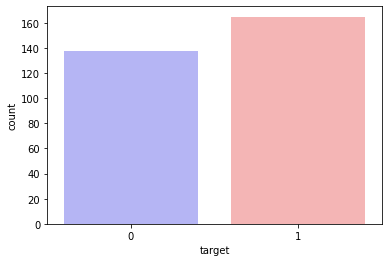

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=dataset, palette="bwr")
plt.show()

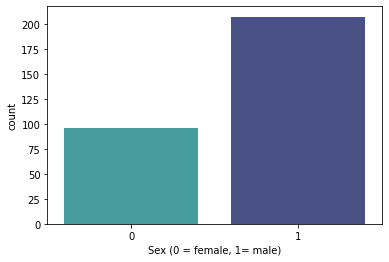

In [3]:
sns.countplot(x='sex', data=dataset, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [4]:
dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


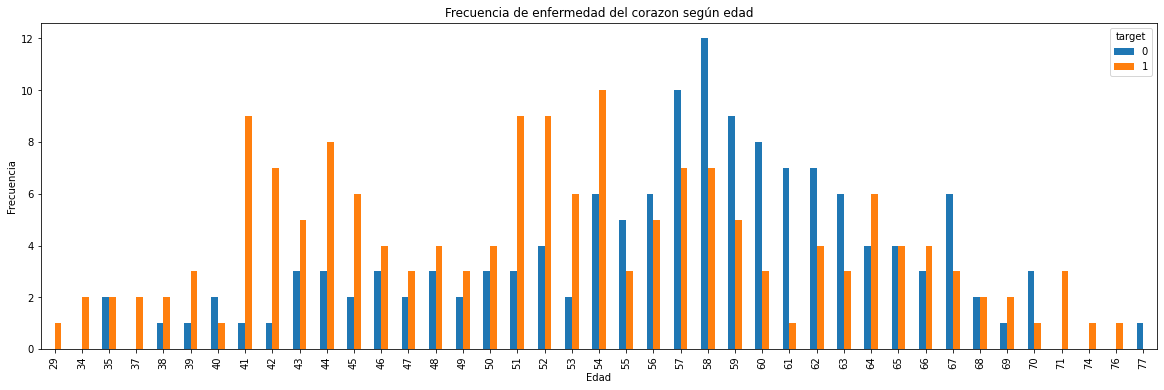

In [5]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia de enfermedad del corazon según edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

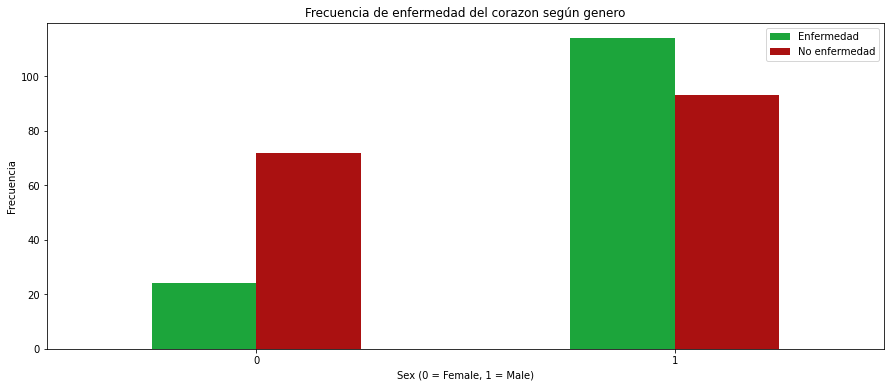

In [6]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frecuencia de enfermedad del corazon según genero')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Enfermedad", "No enfermedad"])
plt.ylabel('Frecuencia')
plt.show()

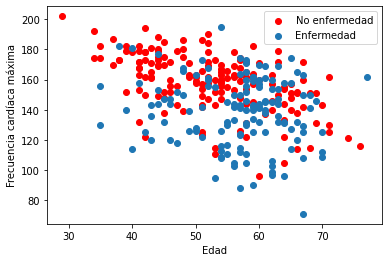

In [7]:
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["No enfermedad", "Enfermedad"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardíaca máxima")
plt.show()

### 3. Transformación de las variables categóricas en variables <i>dummy</i>


Como 'cp', 'thal' y 'slope' son variables categóricas, las convertiremos en variables ficticias.

In [8]:
a = pd.get_dummies(dataset['cp'], prefix = "cp")
b = pd.get_dummies(dataset['thal'], prefix = "thal")
c = pd.get_dummies(dataset['slope'], prefix = "slope")

In [9]:
frames = [dataset, a, b, c]
dataset = pd.concat(frames, axis = 1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [10]:
dataset = dataset.drop(columns = ['cp', 'thal', 'slope'])
dataset.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## 4. Aprendizaje de un modelo de clasificación de tipo árbol de decisión 

In [11]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = dataset.iloc[0:len(dataset),0:13]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
y = dataset.iloc[0:len(dataset),13]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [13]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[66  5]
 [ 7 13]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        71
           1       0.72      0.65      0.68        20

    accuracy                           0.87        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.86      0.87      0.87        91



In [14]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
          'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']
classes=['0','1']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True,  rounded=True, impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')

/home/irock/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<img src="modelo.png">Modelo DecisionTree</img>

## 5. Comparación con otros modelos de clasificación: Regresión logística y Random Forest

In [15]:
from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/home/irock/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[64  7]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        71
           1       0.73      0.95      0.83        20

    accuracy                           0.91        91
   macro avg       0.86      0.93      0.88        91
weighted avg       0.93      0.91      0.92        91



In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[64  7]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.68      0.75      0.71        20

    accuracy                           0.87        91
   macro avg       0.80      0.83      0.81        91
weighted avg       0.87      0.87      0.87        91

